In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

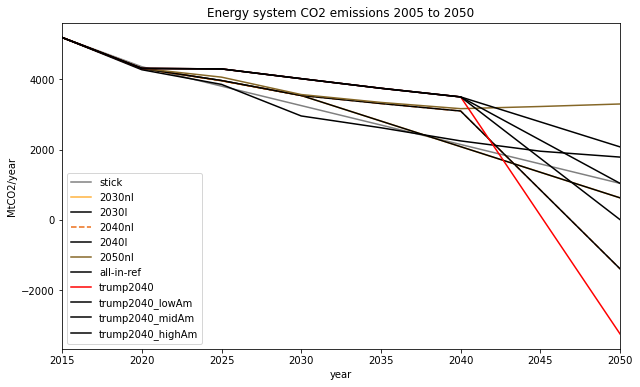

In [2]:
#trajectory
df=pd.read_excel("CO2_accounting_2025_rr2.xlsx",sheet_name='total')
df = df[df['year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
time=df['year']

# Define custom color map
custom_colors = {
    'stick': 'grey',
    '2030nl': '#FFB23D',
    '2040nl': '#EC6D18',
    'trump2040': 'red',
#     'Carrots w/ Slow Stick, Trump 2.0': '#800020',
    '2050nl': '#856727'
}

# Define custom line styles
custom_linestyles = {
    'stick': '-',
    '2030nl': '-',
    '2040nl': '--',
    'trump2040': '-',
#     'Carrots w/ Slow Stick, Trump 2.0': '--',
    '2050nl': '-'
}

# Plot all columns with specified colors and linestyles
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:  # Exclude 'year' column
    color = custom_colors.get(column, 'black')  # Default color is black
    linestyle = custom_linestyles.get(column, '-')  # Default linestyle is solid
    plt.plot(df['year'], df[column], label=column, color=color, linestyle=linestyle)



# Add labels and title
plt.xlabel('year')
plt.ylabel("MtCO2/year")
plt.title('Energy system CO2 emissions 2005 to 2050')
plt.legend()
plt.xlim(2015, 2050)


# plt.title("Energy system CO2 emissions since 2015",  fontsize = 16)
# plt.savefig("RR1_trump.svg")


plt.show()

In [3]:
df2=df.copy()
df2.index = range(0, 8)
ES=df2['stick']
E2030 = df2['2030nl']
E2040 = df2['2040nl']
# E2030Trump = df2['trump2030']
E2040Trump=df2['trump2040']
E2050=df2['2050nl']
E2040Trump_lowAm=df2['trump2040_lowAm']

In [4]:
E2040Trump

0    5188.910680
1    4308.703123
2    4294.403339
3    4016.460228
4    3743.642887
5    3497.571418
6     125.453609
7   -3246.664200
Name: trump2040, dtype: float64

Text(0, 0.5, 'GtCO2')

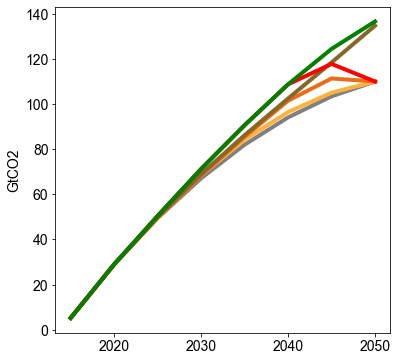

In [5]:
#cumulative

#calculating
ES_c=[]
Total=0
for i in range(len(df['year'])):

    year = df['year'].iloc[i]
    emission =ES.iloc[i]
    if year == 2015:
        ES_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+ES.iloc[i-1])
        Total = Total + total
        ES_c.append(Total)

E2030_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2030.iloc[i]
    if year == 2015:
        E2030_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+E2030.iloc[i-1])
        Total = Total + total
        E2030_c.append(Total)

E2040_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040.iloc[i]
    if year == 2015:
        E2040_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040.iloc[i-1])
        Total = Total + total
        E2040_c.append(Total)
E2050_c=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2050[i]
    if year == 2015:
        E2050_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2050[i-1])
        Total = Total + total
        E2050_c.append(Total)

# E2030_ct=[]
# Total = 0
# for i in range(len(df['year'])):
#     year = df['year'].iloc[i]
#     emission =E2030Trump.iloc[i]
#     if year == 2015:
#         E2030_ct.append(emission)
#         Total = Total + emission
#     else:
#         total=1/2*5*(emission+E2030Trump.iloc[i-1])
#         Total = Total + total
#         E2030_ct.append(Total)

E2040_ct=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040Trump.iloc[i]
    if year == 2015:
        E2040_ct.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040Trump.iloc[i-1])
        Total = Total + total
        E2040_ct.append(Total)
        
E2040_ct_lowAm=[]
Total = 0
for i in range(len(df['year'])):
    year = df['year'].iloc[i]
    emission =E2040Trump_lowAm.iloc[i]
    if year == 2015:
        E2040_ct_lowAm.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2040Trump_lowAm.iloc[i-1])
        Total = Total + total
        E2040_ct_lowAm.append(Total)
        
        
ES_c= [x / 1000 for x in ES_c]
E2030_c=[x / 1000 for x in E2030_c]
E2040_c=[x / 1000 for x in E2040_c]
E2050_c=[x / 1000 for x in E2050_c]
# E2030_ct=[x / 1000 for x in E2030_ct]
E2040_ct=[x / 1000 for x in E2040_ct]
# E2040_ct=[x / 1000 for x in E2040_ct]
E2040_ct_lowAm=[x / 1000 for x in E2040_ct_lowAm]

#plotting
plt.figure(figsize=(6, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14


# plt.plot(time,ES_c, color='gray', linewidth=4)
plt.plot(time,ES_c, color='grey', linewidth=4)
plt.plot(time,E2030_c, color= '#FFB23D', linewidth=4)
plt.plot(time,E2040_c, color = '#EC6D18', linewidth=4)
plt.plot(time,E2050_c, color='#856727', linewidth=4)
# plt.plot(time,E2030_ct, color= 'red', linewidth=4)
plt.plot(time,E2040_ct, color = 'red', linewidth=4)
plt.plot(time,E2040_ct_lowAm, color = 'green', linewidth=4)

plt.ylabel("GtCO2")



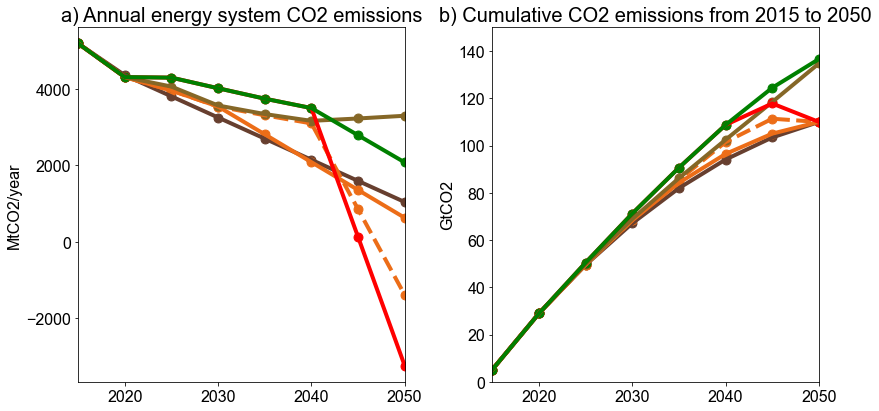

In [ ]:
#plotting code

fig = plt.figure(figsize=(12, 6))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16



# gs = fig.add_gridspec(1,2)
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
# ax3 = fig.add_subplot(gs[2])

ax1.plot(time,ES, color='#673F2F', linewidth=4)
ax1.plot(time,E2030, color= '#EC6D18', linewidth=4,linestyle = "-")
ax1.plot(time,E2040 , color = '#EC6D18', linewidth=4,linestyle = "--")
ax1.plot(time,E2050 , color = '#856727', linewidth=4, linestyle = "-")
ax1.plot(time,E2040Trump, color= 'red', linewidth=4,linestyle = "-")
ax1.plot(time,E2040Trump_lowAm, color= 'green', linewidth=4,linestyle = "-")

ax1.scatter(time,ES, color='#673F2F', s=80)
ax1.scatter(time,E2030, color= '#EC6D18', s=80)
ax1.scatter(time,E2040 , color = '#EC6D18', s=80)
ax1.scatter(time,E2050 , color = '#856727', s=80)
ax1.scatter(time,E2040Trump, color= 'red', s=80)
ax1.scatter(time,E2040Trump_lowAm, color= 'green', s=80)
# ax1.plot(time,E2040Trump, color = '#800020', linewidth=4,linestyle = "--")
ax1.set_ylabel("MtCO2/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='#673F2F', linewidth=4)
ax2.plot(time,E2030_c, color= '#EC6D18', linewidth=4, linestyle = "-")
ax2.plot(time,E2040_c, color = '#EC6D18', linewidth=4, linestyle = "--")
ax2.plot(time,E2050_c, color='#856727', linewidth=4, linestyle = "-")
# plt.plot(time,E2030_ct, color= 'red', linewidth=4, linestyle = "-")
ax2.plot(time,E2040_ct, color = 'red', linewidth=4, linestyle = "-")
ax2.plot(time,E2040_ct_lowAm, color = 'green', linewidth=4, linestyle = "-")

ax2.scatter(time,ES_c, color='#673F2F', s=80)
ax2.scatter(time,E2030_c, color= '#EC6D18', s=80)
ax2.scatter(time,E2040_c, color = '#EC6D18', s=80)
ax2.scatter(time,E2050_c, color = '#856727', s=80)
ax2.scatter(time,E2040_ct, color= 'red', s=80)
ax2.scatter(time,E2040_ct_lowAm, color= 'green', s=80)

ax2.set_ylabel("GtCO2")
ax2.set_xlim(2015, 2050)
ax2.set_ylim(0, 150)



ax1.set_title("a) Annual energy system CO2 emissions",  fontsize = 20)
ax2.set_title("b) Cumulative CO2 emissions from 2015 to 2050", fontsize = 20)
# ax3.set_title("c) CO2 prices in 2050", fontsize = 16)

plt.tight_layout()
fig.savefig("emissions_and_price_202502v2.svg", transparent=True)
plt.show()

C:\Users\Huilin\AppData\Local\Temp\ipykernel_24088\1962751788.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row2015_2['land use']=luc2015[1]
C:\Users\Huilin\AppData\Local\Temp\ipykernel_24088\1962751788.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row2030_2['land use'] = luc2035[[0,1,2]]
C:\Users\Huilin\AppData\Local\Temp\ipykernel_24088\1962751788.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

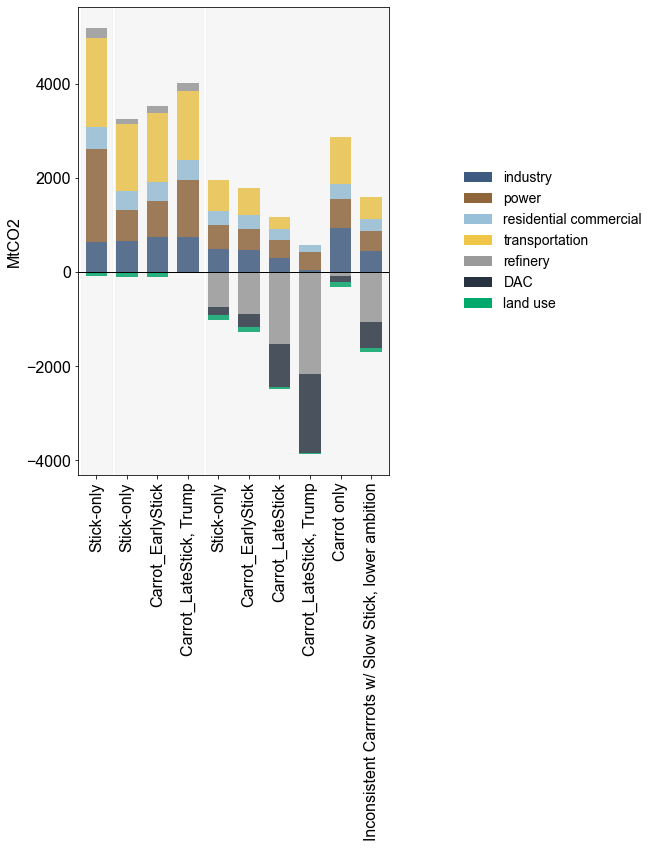

In [ ]:
#1 sectoral emissions 2015 and 2030
#Sectoral

# calculation
Sec_stick=pd.read_csv("202502_CO2_sector_stick_20240822_80p.csv")
Sec_2030_nl=pd.read_csv("202502_CO2_sector_crt2030_80p_nl_202502.csv")
Sec_2030_l=pd.read_csv("202502_CO2_sector_crt2030_80p_l_202502.csv")
Sec_2040_nl=pd.read_csv("202502_CO2_sector_crt2040_80p_nl_202502.csv")
Sec_2040_l=pd.read_csv("202502_CO2_sector_crt2040_80p_l_202502.csv")
# Sec_2030_nl_trump=pd.read_csv("CO2_sector_crt2030_80p_nl_0821_trump.csv")
# Sec_2030_l_trump=pd.read_csv("CO2_sector_crt2030_80p_l_0821_trump.csv")
Sec_2040_nl_trump=pd.read_csv("202502_CO2_sector_crt2040_80p_nl_202502_trump.csv")
Sec_2050 = pd.read_csv("2025_CO2_sector_crt2050_202502.csv")
Sec_trump_lowAmbition=pd.read_csv("20250618_CO2_sector_crt2040_100p_nl_202502_trump_sameEnd.csv")
# Sec_2040_l_trump=pd.read_csv("CO2_sector_crt2040_80p_l_0821_trump.csv")
# Sec_CS['Sector_B']=[]
def sectoralallocation(x):
    
    SEC=[]
    for sec in x['sector']:

        if sec in ["backup_electricity" ,"N fertilizer", "cement" ,     "H2 central production" ,    "H2 wholesale dispensing" ,  "other industrial energy use" , "other industrial feedstocks" , "process heat cement"] :
            SEC.append("industry")
        elif sec in ["csp_backup", "base load generation",  "intermediate generation",  "peak generation","subpeak generation"]:
            SEC.append("power")
        elif sec in ["comm cooking" , "comm cooling" , "comm heating", "comm hot water", "comm other", "resid clothes dryers", "resid cooking" ,
                     "resid heating","resid hot water" , "resid other"]:
            SEC.append("residential commercial")
        elif "trn_" in sec:
#         elif sec.contains("trn_"):
            SEC.append("transportation")
        elif sec in ['biomass liquids', 'regional biomassOil' , "gas pipeline" ,"gas processing" , "oil refining" ,'regional corn for ethanol',"coal to liquids" ,"gas to liquids" , 'regional biomass','delivered biomass' ]:
            SEC.append("refinery")#highlight regional biomass(Oil)
        elif sec in ["airCO2","process heat dac"]:
            SEC.append("DAC")


        else:
            SEC.append("???")
            print(sec)
            continue
    x['Sector_B']=SEC

#     Allsecs=["agriculture","industry","power","residential commercial","transportation","DAC"]
    Allsecs=["industry","power","residential commercial","transportation","refinery","DAC"]


    SectoralE = []
    for sec in Allsecs:
        sector_e = []
        e2005 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2005),'co2.emiss'].sum()
        e2015 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2015),'co2.emiss'].sum()
        e2020 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2020),'co2.emiss'].sum()
        e2025 = x.loc[(x['Sector_B'] == sec) & (x['Year'] == 2025),'co2.emiss'].sum()
    #         e2025 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2025'].sum()
        e2030 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2030),'co2.emiss'].sum()
        e2035 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2035),'co2.emiss'].sum()
        e2040 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2040),'co2.emiss'].sum()
    #         e2040 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2040'].sum()
    #         e2045 = Sec_60.loc[Sec_60['Sector_B'] == sec, 'i2045'].sum()
        e2050 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2050),'co2.emiss'].sum()
        e2045 = x.loc[(x['Sector_B'] == sec)& (x['Year'] == 2045),'co2.emiss'].sum()
        sector_e.append(e2005)
        sector_e.append(e2015)
        sector_e.append(e2020)
        sector_e.append(e2025)
        sector_e.append(e2030)
        sector_e.append(e2035)
        
    #         sector_e.append(e2040)
    #         sector_e.append(e2045)
        sector_e.append(e2040)
        sector_e.append(e2045)
        sector_e.append(e2050)
        
        SectoralE.append(sector_e)

        # print(SectoralE)
    row_names = Allsecs
    # col_names = ['2025', '2030', '2035', '2040', '2045', '2050']
    col_names = ['2005','2015', '2020','2025','2030','2035', '2040','2045','2050']
    SectoralE_df = pd.DataFrame(SectoralE, index=row_names, columns=col_names)
    scale = 44/12
    SectoralE_df = SectoralE_df.applymap(lambda x: x * scale if isinstance(x, (int, float)) else x)
#     print(SectoralE_df)



    return(SectoralE_df)


all_files = [Sec_stick, Sec_2030_nl, Sec_2040_nl,Sec_2030_l, Sec_2040_l,
             #Sec_2030_nl_trump, 
             Sec_2040_nl_trump, Sec_2050, Sec_trump_lowAmbition#,Sec_2030_l_trump, Sec_2040_l_trump
            ]
all_names = ['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick', 'Carrot_EarlyStick_Innovation','Carrot_LateStick_Innovation',
            #'Carrot_EarlyStick, Trump', 
             'Carrot_LateStick, Trump',"Carrot only","Inconsistent Carrrots w/ Slow Stick, lower ambition"#, 'Carrot_EarlyStick_Innovation, Trump','Carrot_LateStick_Innovation, Trump'
            ]


sec2015 = pd.DataFrame(columns=all_names)
sec2020 = pd.DataFrame(columns=all_names)
sec2025 = pd.DataFrame(columns=all_names)
sec2030 = pd.DataFrame(columns=all_names)

sec2035 = pd.DataFrame(columns=all_names)
sec2050 = pd.DataFrame(columns=all_names)

sec2040 = pd.DataFrame(columns=all_names)
sec2045 = pd.DataFrame(columns=all_names)

# print(sec2015)
# print(sec2035)
# print(sec2050)


for i in range(len(all_files)):
    file=all_files[i]
#     print(file)
    
    name=all_names[i]
#     print(type(name))
    sec2015[name]=sectoralallocation(file)['2015']
    sec2020[name]=sectoralallocation(file)['2020']
    sec2025[name]=sectoralallocation(file)['2025']
    sec2030[name]=sectoralallocation(file)['2030']
    sec2035[name]=sectoralallocation(file)['2035']
    sec2050[name]=sectoralallocation(file)['2050']
    sec2040[name]=sectoralallocation(file)['2040']
    sec2045[name]=sectoralallocation(file)['2045']


Sec15v=sec2015.transpose()
Sec20v=sec2020.transpose()
Sec25v=sec2025.transpose()
Sec30v=sec2030.transpose()
Sec35v=sec2035.transpose()
Sec40v=sec2040.transpose()
Sec45v=sec2045.transpose()
Sec50v=sec2050.transpose()

Sec15v['year']='i2015'
Sec20v['year']='i2020'
Sec25v['year']='i2025'
Sec30v['year']='i2030'
Sec35v['year']='i2035'
Sec40v['year']='i2040'
Sec45v['year']='i2045'
Sec50v['year']='i2050'



Sec15v2=Sec15v.iloc[[0]]
combined_df = pd.concat([Sec15v, Sec20v, Sec25v, Sec30v, Sec35v, Sec40v, Sec45v, Sec50v])

#add agricaultural things here
luc=pd.read_excel("CO2_LUC_80p.xlsx", sheet_name="CO2")

luc2=luc.set_index('scenarios')
luc3 = luc2.drop(columns=['E2005','E2010'])
luc4=luc3.T
luc4.reindex()
luc2015 = luc4.loc['E2015']
luc2030 = luc4.loc['E2030']
luc2035 = luc4.loc['E2035']
luc2050 = luc4.loc['E2050']

combined_df4 = combined_df.copy()
row2015_2=combined_df4.loc[(combined_df4.index == 'Stick-only') & (combined_df4['year'].isin(['i2015']))]

row2035_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick',  
                                                       'Carrot_EarlyStick, Trump',
                                                       'Carrot_LateStick, Trump'#, 
#                                                            'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation'
                                                    ])) & 
                                 (combined_df4['year'].isin(['i2035']))]

row2030_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 
                                                       'Carrot_LateStick, Trump',
                                                      # "Carrot only"#, 
#                                                        'Carrot_LateStick', 
#                                                            'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation'
                                                    ])) & 
                                 (combined_df4['year'].isin(['i2030']))]


row2050_2 = combined_df4.loc[(combined_df4.index.isin(['Stick-only','Carrot_EarlyStick', 'Carrot_LateStick', 
#                                                            'Carrot_EarlyStick_Innovation', 'Carrot_LateStick_Innovation',
                                                      #'Carrot_EarlyStick, Trump', 
                                                       'Carrot_LateStick, Trump', "Carrot only", "Inconsistent Carrrots w/ Slow Stick, lower ambition"#, 'Carrot_EarlyStick_Innovation, Trump','Carrot_LateStick_Innovation, Trump'
            
                                                      ])) & 
                                 (combined_df4['year'].isin(['i2050']))]
row2050_2

row2015_2['land use']=luc2015[1]

row2030_2['land use'] = luc2035[[0,1,2]]

row2035_2['land use'] = luc2035[[0,1]]
row2050_2['land use'] = luc2050
row2035_2

colors4 = [#'#3cb44b',green for land use
    '#3d5a80',#dark blue, 
           "#90653A",
          
           
          '#98c1d9',# light blue, residential commercial
    
          '#f0c648',
           '#9a9a9a',
          '#293241',
    '#00a86b'#this is for beccs
          ]


Huilin4 = ListedColormap(colors4, name='my_colormap')

all_df_secem = pd.concat([row2015_2, row2030_2, row2050_2])
# Create figure and axis with the desired size
fig, ax = plt.subplots(figsize=(10, 12))  



# Set global font properties
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14

# Plot the data on the existing axis
all_df_secem.plot(kind='bar', stacked=True, cmap=Huilin4, width=0.7, ax=ax)  

# Formatting
ax.set_ylabel("MtCO2")

# Add shaded backgrounds
ax.axvspan(-0.5, 0.5, color='#D3D3D3', alpha=0.2)
ax.axvspan(0.6, 3.5, color='#D3D3D3', alpha=0.2)
ax.axvspan(3.6, 10.5, color='#D3D3D3', alpha=0.2)

ax.axhline(y=0, color='black', linewidth=1)

# Adjust legend
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'family': 'Arial', 'size': 14}, ncol=1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Index(['Stick-only', 'Carrot_EarlyStick', 'Carrot_LateStick',
       'Carrot_LateStick, Trump', 'Carrot only',
       'Inconsistent Carrrots w/ Slow Stick, lower ambition'],
      dtype='object')


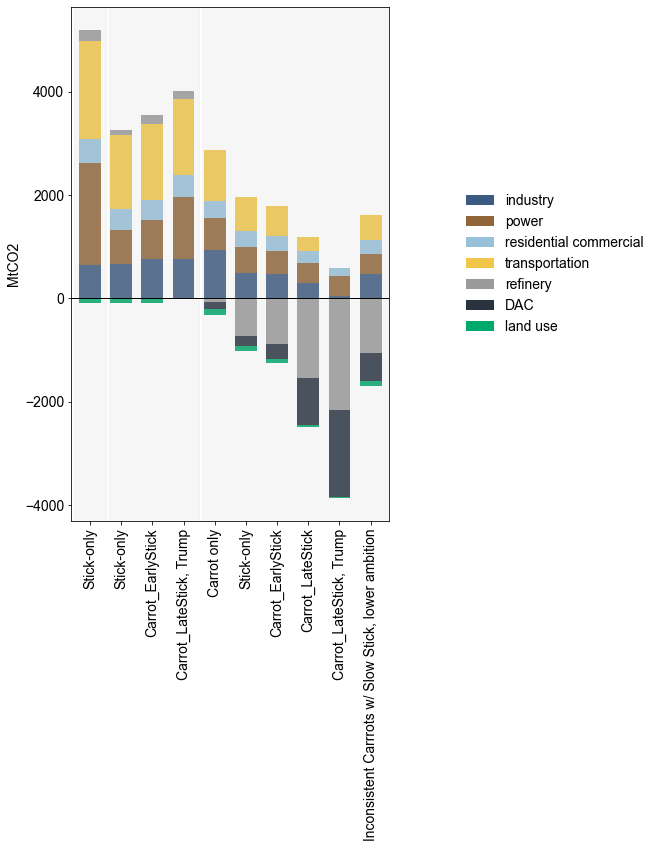

In [ ]:

first_part = all_df_secem.iloc[:4]
second_part = all_df_secem.iloc[4:]

desired_order = [
    'Carrot only',
    'Stick-only',
    'Carrot_EarlyStick',
    'Carrot_LateStick',
    'Carrot_LateStick, Trump',
    'Inconsistent Carrrots w/ Slow Stick, lower ambition'
    
]

print(second_part.index)

second_part = second_part.loc[desired_order]

all_df_secem_sorted = pd.concat([first_part, second_part])
fig, ax = plt.subplots(figsize=(10, 12))  



# Set global font properties
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 14

# Plot the data on the existing axis
all_df_secem_sorted.plot(kind='bar', stacked=True, cmap=Huilin4, width=0.7, ax=ax)  

# Formatting
ax.set_ylabel("MtCO2")

# Add shaded backgrounds
ax.axvspan(-0.5, 0.5, color='#D3D3D3', alpha=0.2)
ax.axvspan(0.6, 3.5, color='#D3D3D3', alpha=0.2)
ax.axvspan(3.6, 10.5, color='#D3D3D3', alpha=0.2)

ax.axhline(y=0, color='black', linewidth=1)

# Adjust legend
ax.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'family': 'Arial', 'size': 14}, ncol=1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

C:\Users\Huilin\AppData\Local\Temp\ipykernel_24088\1362467612.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


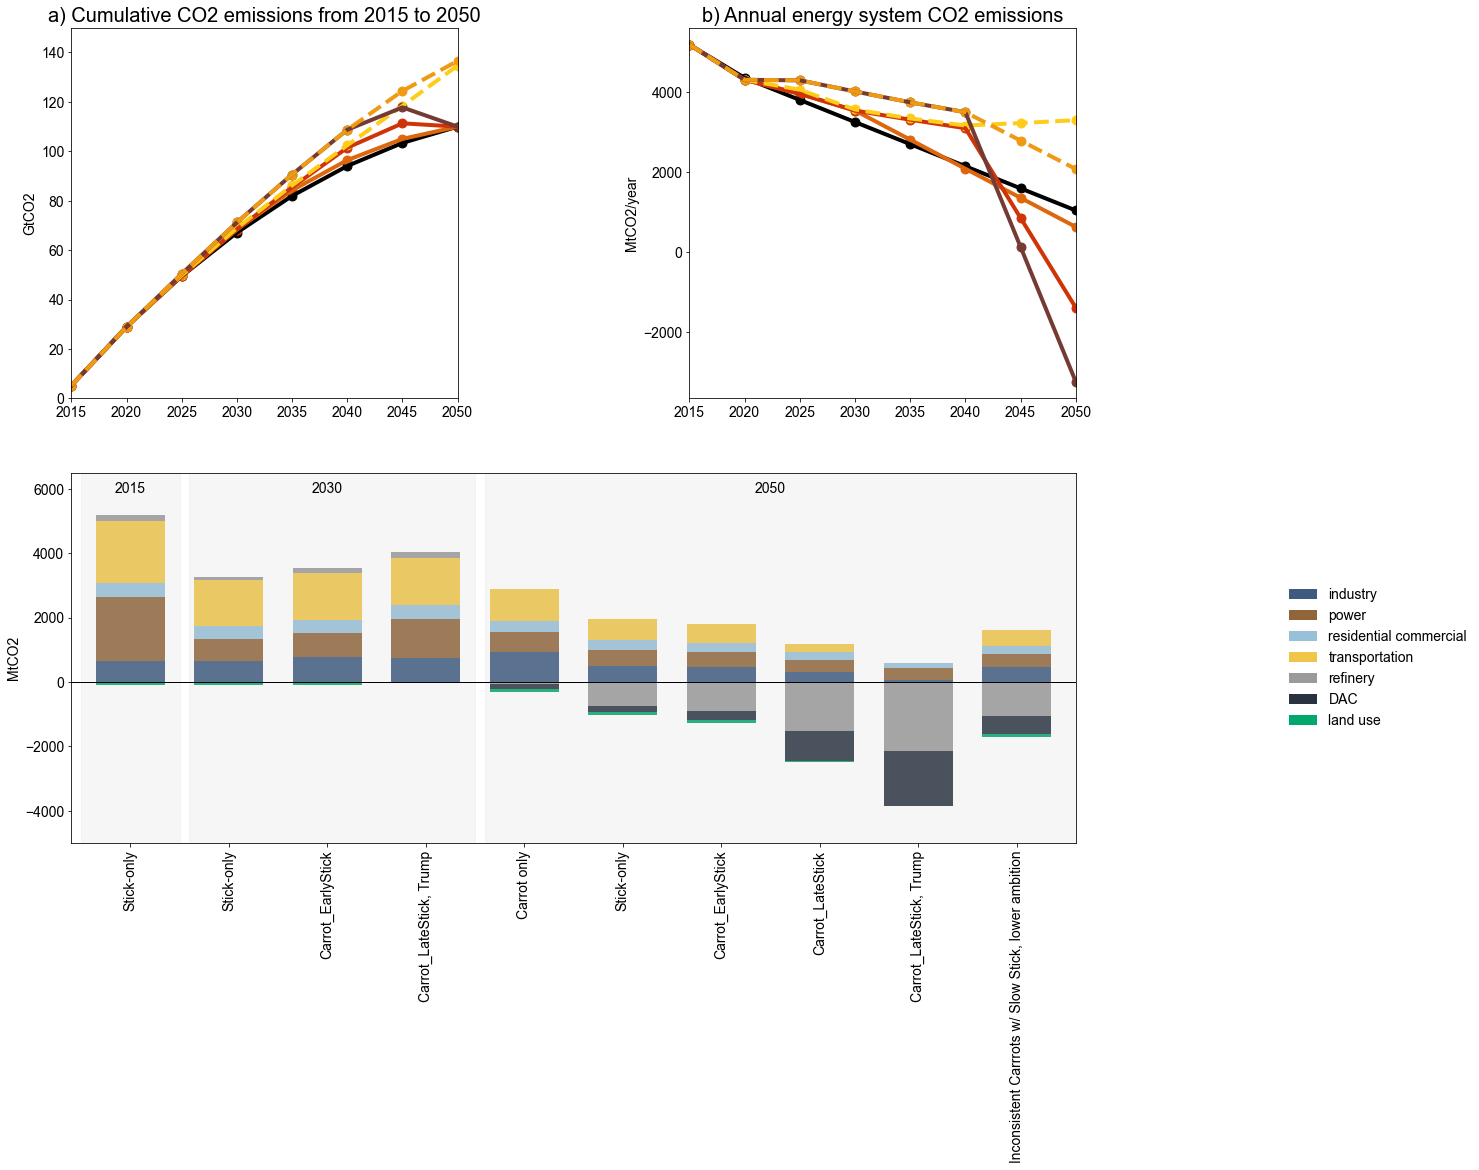

In [ ]:
import matplotlib.gridspec as gridspec

# Create figure with specific size
fig = plt.figure(figsize=(18, 15))  

# Define grid layout
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1], wspace=0.6)

# First row: Two equal-sized plots
ax1 = fig.add_subplot(gs[0, 1])  # Left plot
ax2 = fig.add_subplot(gs[0, 0])  # Right plot

# Second row: One wide plot spanning both columns
ax3 = fig.add_subplot(gs[1, :])  # Bottom plot spanning both columns


ax1.plot(time,ES, color='black', linewidth=4)
ax1.plot(time,E2030, color= '#de660d', linewidth=4,linestyle = "-")
ax1.plot(time,E2040 , color = '#ce3407', linewidth=4,linestyle = "-")
ax1.plot(time,E2050 , color = '#ffcc19', linewidth=4, linestyle = "--")
ax1.plot(time,E2040Trump, color= '#743a34', linewidth=4,linestyle = "-")
ax1.plot(time,E2040Trump_lowAm, color= '#ef9a13', linewidth=4,linestyle = "--")

ax1.scatter(time,ES, color='black', s=80)
ax1.scatter(time,E2030, color= '#de660d', s=80)
ax1.scatter(time,E2040 , color = '#ce3407', s=80)
ax1.scatter(time,E2050 , color = '#ffcc19', s=80)
ax1.scatter(time,E2040Trump, color= '#743a34', s=80)
ax1.scatter(time,E2040Trump_lowAm, color= '#ef9a13', s=80)
# ax1.plot(time,E2040Trump, color = '#800020', linewidth=4,linestyle = "--")
ax1.set_ylabel("MtCO2/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='black', linewidth=4)
ax2.plot(time,E2030_c, color= '#de660d', linewidth=4, linestyle = "-")#EC6D18
ax2.plot(time,E2040_c, color = '#ce3407', linewidth=4, linestyle = "-")#f5c77e
ax2.plot(time,E2050_c, color='#ffcc19', linewidth=4, linestyle = "--")#856727
# plt.plot(time,E2030_ct, color= 'red', linewidth=4, linestyle = "-")
ax2.plot(time,E2040_ct, color = '#743a34', linewidth=4, linestyle = "-")#red
ax2.plot(time,E2040_ct_lowAm, color = '#ef9a13', linewidth=4, linestyle = "--")#e0115f

ax2.scatter(time,ES_c, color='black', s=80)
ax2.scatter(time,E2030_c, color= '#de660d', s=80)#EC6D18
ax2.scatter(time,E2040_c, color = '#ce3407', s=80)#f5c77e
ax2.scatter(time,E2050_c, color = '#ffcc19', s=80)#856727
ax2.scatter(time,E2040_ct, color= '#743a34', s=80)#red
ax2.scatter(time,E2040_ct_lowAm, color= '#ef9a13', s=80)#e0115f

ax2.set_ylabel("GtCO2")
ax2.set_xlim(2015, 2050)
ax2.set_ylim(0, 150)


ax1.set_title("b) Annual energy system CO2 emissions",  fontsize = 20)
ax2.set_title("a) Cumulative CO2 emissions from 2015 to 2050", fontsize = 20)
# ax3.set_title("c) CO2 prices in 2050", fontsize = 16)

# Plot the data on the existing axis
all_df_secem_sorted.plot(kind='bar', stacked=True, cmap=Huilin4, width=0.7, ax=ax3)  

# Formatting
ax3.set_ylabel("MtCO2")

# Add shaded backgrounds
ax3.axvspan(-0.5, 0.5, color='#D3D3D3', alpha=0.2)
ax3.axvspan(0.6, 3.5, color='#D3D3D3', alpha=0.2)
ax3.axvspan(3.6, 10.5, color='#D3D3D3', alpha=0.2)
ax3.set_ylim(-5000,6500)
ax3.axhline(y=0, color='black', linewidth=1)
ax3.text(0, 6000, '2015', fontsize=14, ha='center', va='center', color='black')
ax3.text(2, 6000, '2030', fontsize=14, ha='center', va='center', color='black')
ax3.text(6.5, 6000, '2050', fontsize=14, ha='center', va='center', color='black')
# Adjust legend
ax3.legend(loc='center left', bbox_to_anchor=(1.2, 0.5), frameon=False, prop={'family': 'Arial', 'size': 14}, ncol=1)

plt.tight_layout()
plt.savefig("RR2 figure 2.svg", transparent=True)
plt.show()